<a href="https://colab.research.google.com/github/julianayuri/ReconhecimentoPadroes/blob/main/Atividade03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
import numpy as np


In [ ]:
haberman = fetch_openml(name='haberman', version=1)
X, y = haberman.data, haberman.target
X.shape, y.shape

((306, 3), (306,))

In [ ]:
X.head()

,Age_of_patient_at_time_of_operation,Patients_year_of_operation,Number_of_positive_axillary_nodes_detected
0,30.0,64,1.0
1,30.0,62,3.0
2,30.0,65,0.0
3,31.0,59,2.0
4,31.0,65,4.0


In [ ]:
X.dtypes

Age_of_patient_at_time_of_operation            float64
Patients_year_of_operation                    category
Number_of_positive_axillary_nodes_detected     float64
dtype: object

In [ ]:
X['Patients_year_of_operation'] = pd.to_numeric(X['Patients_year_of_operation'], errors='coerce')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
X.dtypes

Age_of_patient_at_time_of_operation           float64
Patients_year_of_operation                      int64
Number_of_positive_axillary_nodes_detected    float64
dtype: object

In [ ]:
model = LogisticRegression()
model.fit(X,y)
model.score(X,y)

0.7483660130718954

In [ ]:
ypred = model.predict(X)
mean_squared_error(y, ypred)

0.25163398692810457

In [ ]:
coeficiente = model.coef_
coeficiente

array([[ 0.01988257, -0.00975411,  0.08838822]])

In [ ]:
intercept = model.intercept_
intercept

array([-1.86233569])

In [ ]:
def plot_grafico(intercept, delta, X, y):
  intercepts = np.linspace(intercept - delta, intercept + delta, y.size)
  mses = []
  for inter in intercepts:
    model.intercept_ = inter
    ypred = model.predict(X)
    mse = mean_squared_error(y, ypred)
    mses.append(mse)
  plt.plot(intercepts, mses)
  plt.show()

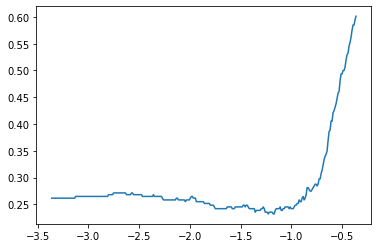

In [ ]:
plot_grafico(intercept, 1.5, X, y)

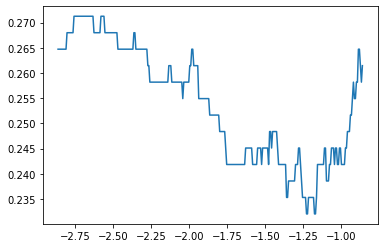

In [ ]:
plot_grafico(intercept, 1, X, y)

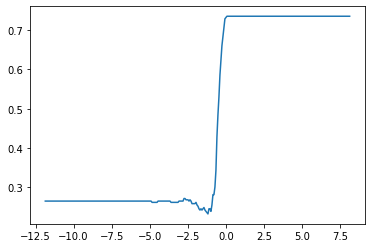

In [ ]:
plot_grafico(intercept, 10, X, y)